In [1]:
import pickle
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
import seaborn as sns
sns.set()

In [3]:
def average(olist):
    avg_list = []
    running_avg = 0
    for i in range(len(olist)):
        running_avg = (running_avg * (i) + olist[i] )/ (i+1)
        avg_list.append(running_avg)
    return avg_list

In [14]:
prefix = 'Ep[1000]_frac[0.1]_1_10_0.01_Mom[0.0]_cnn_N[1]_EPS[1.0]_cifar_iid[1]_seed[1]'
suffix = '.pickle'
filename= prefix+suffix
print(filename)

infile = open(filename,'rb')
list_loss_accuracy = pickle.load(infile)
infile.close()

train_loss, train_accuracy, loss_improve, acc_improve = list_loss_accuracy




Ep[1000]_frac[0.1]_1_10_0.01_Mom[0.0]_cnn_N[1]_EPS[1.0]_cifar_iid[1]_seed[1].pickle


In [15]:
prefix2 = 'Ep[1000]_frac[0.1]_1_10_0.01_Mom[0.0]_cnn_N[0]_EPS[0.0]_cifar_iid[1]_seed[1]'
suffix2 = '.pickle'
filename2= prefix2+suffix2
print(filename2)

infile2 = open(filename2,'rb')
list_loss_accuracy2 = pickle.load(infile2)
infile2.close()

train_loss2, train_accuracy2, loss_improve2, acc_improve2 = list_loss_accuracy2



Ep[1000]_frac[0.1]_1_10_0.01_Mom[0.0]_cnn_N[0]_EPS[0.0]_cifar_iid[1]_seed[1].pickle


In [16]:
avg_loss_improve = average(loss_improve)
avg_acc_improve = average(acc_improve)

In [17]:
avg_loss_improve2 = average(loss_improve2)
avg_acc_improve2 = average(acc_improve2)

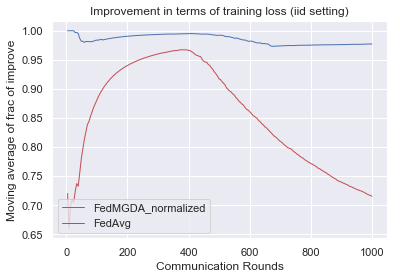

In [23]:
plt.figure()
plt.title('Improvement in terms of training loss (iid setting)')
plt.plot(range(len(avg_loss_improve))[4::5], avg_loss_improve[4::5], color='r',linewidth=1)
plt.plot(range(len(avg_loss_improve2))[4::5], avg_loss_improve2[4::5], color='b',linewidth=1)
plt.legend(['FedMGDA_normalized', 'FedAvg'], loc='lower left')
plt.ylabel('Moving average of frac of improve')
plt.xlabel('Communication Rounds')
# loss_img_name = prefix + '_loss.png'
plt.savefig('frac_impr_iid_loss_norm.png')
plt.show()


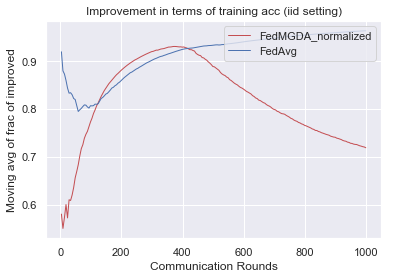

In [26]:
plt.figure()
plt.title('Improvement in terms of training acc (iid setting)')
plt.plot(range(len(avg_acc_improve))[4::5], avg_acc_improve[4::5], color='r',linewidth=1)
plt.plot(range(len(avg_acc_improve2))[4::5], avg_acc_improve2[4::5], color='b',linewidth=1)
plt.legend(['FedMGDA_normalized', 'FedAvg'], loc='upper right')
plt.ylabel('Moving avg of frac of improved')
plt.xlabel('Communication Rounds')
# loss_img_name = prefix + '_loss.png'
plt.savefig('frac_impr_iid_acc_norm.png')
plt.show()

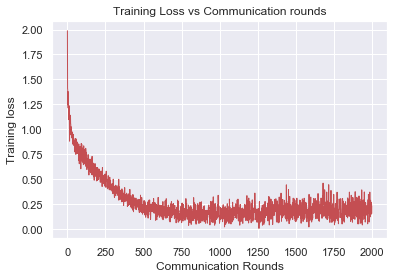

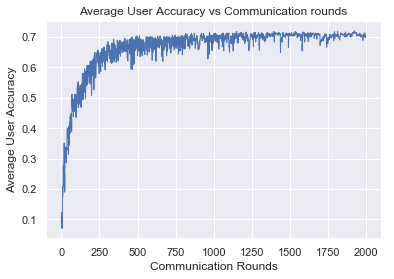

In [20]:


plt.figure()
plt.title('Training Loss vs Communication rounds')
plt.plot(range(len(train_loss)), train_loss, color='r',linewidth=1)
plt.ylabel('Training loss')
plt.xlabel('Communication Rounds')
loss_img_name = prefix + '_loss.png'
plt.savefig(loss_img_name)
plt.show()


# Plot Average Accuracy vs Communication rounds
plt.figure()
plt.title('Average User Accuracy vs Communication rounds')
plt.plot(range(len(train_accuracy)), train_accuracy, color='b',linewidth=1)
plt.ylabel('Average User Accuracy')
plt.xlabel('Communication Rounds')
acc_img_name = prefix + '_acc.png'
plt.savefig(acc_img_name)
plt.show()

